Проведен следующий эксперимент:
1. Найдено фото известного актера.
2. Распознано лицо на фотографии, зона распознавания выделена контрастным овалом.
3. Контрастными кругами выделены глаза. В качестве опыта вместо кружков вставлено стоковое изображение солнцезащитных очков.
4. Все лицо кроме глаз заблюрено.




In [ ]:
import cv2
import gdown

def blur_face(img):
  (h, w) = img.shape[:2]
  dW = int(w / 3.0)
  dH = int(h / 3.0)
  if dW % 2 == 0:
      dW -= 1
  if dH % 2 == 0:
      dH -= 1
  return cv2.GaussianBlur(img, (dW, dH), 0)



In [ ]:
def show_result(original_face, result):
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
    ax1.imshow(cv2.cvtColor(original_face, cv2.COLOR_BGR2RGB))
    ax1.xaxis.set_ticks([])
    ax1.yaxis.set_ticks([])
    ax1.set_title('Исходное изображение')

    ax2.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    ax2.xaxis.set_ticks([])
    ax2.yaxis.set_ticks([])
    ax2.set_title('Результат')

    pyplot.show()

In [ ]:
# Ваше решение
!pip install opencv-python

In [ ]:
gdown.download('https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Brendan_Fraser_October_2022.jpg/1200px-Brendan_Fraser_October_2022.jpg',
               "celebrity.png",
               True)

face_img = cv2.imread('./celebrity.png')    # ориг
face_img2 = face_img.copy()                 # распознавание
face_img3 = face_img.copy()                 # очки
face_img4 = face_img.copy()                 # блюр

classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")
bboxes = classifier.detectMultiScale(face_img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

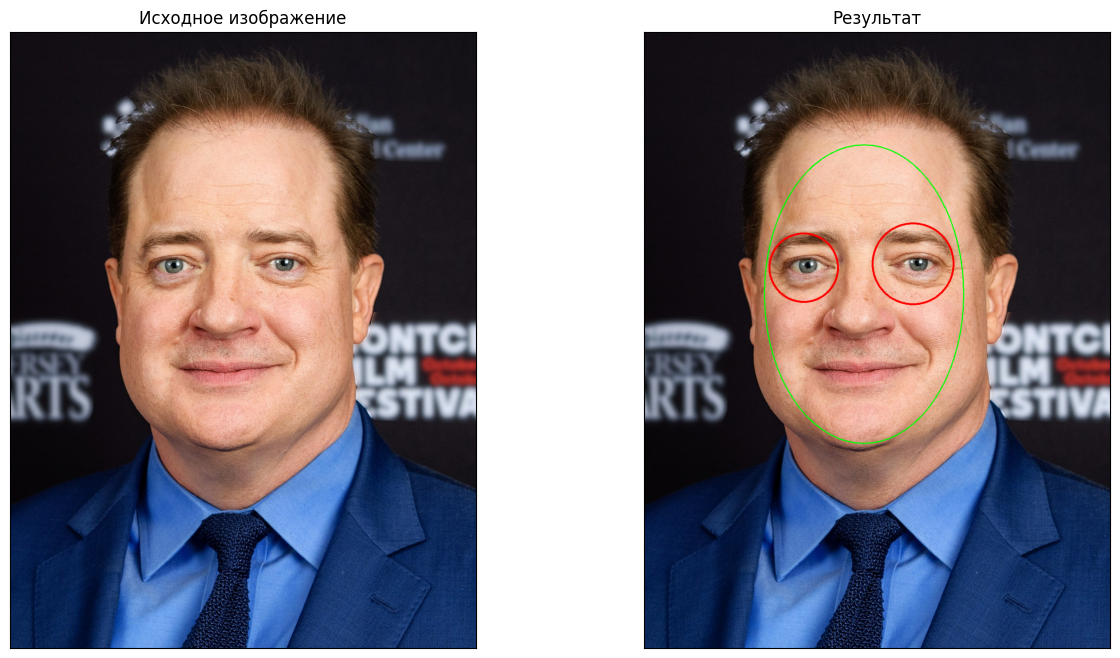

In [ ]:
from matplotlib import pyplot

for box in bboxes:
    x, y, width, height = box
    center = (x + width // 2, y + height // 2)
    axes = (width // 3, height // 2)
    cv2.ellipse(face_img2, center, axes, 0, 0, 360, (0, 255, 0), 2)

    classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")
    eyes = classifier_eye.detectMultiScale(face_img, minSize = (int(width * .15), int(width * .15))) #попытка искать глаза по пропорциям, примерно 15 процентов от ширины лица

    for (x_eye,y_eye,w_eye,h_eye) in eyes:

        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 0, 255)
        thickness = 3
        cv2.circle(face_img2, center, radius, color, thickness)

show_result(face_img, face_img2)

In [ ]:
gdown.download("https://clipart-library.com/img/582486.png",
               "sunglasses.png",
               True)

sunglasses_img = cv2.imread("./sunglasses.png")

In [ ]:
for box in bboxes:
    x, y, width, height = box
    center = (x + width // 2, y + height // 2)
    axes = (width // 3, height // 2)
    cv2.ellipse(face_img2, center, axes, 0, 0, 360, (0, 255, 0), 2)

    classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")
    eyes = classifier_eye.detectMultiScale(face_img, minSize = (100, 100))

    for (x_eye,y_eye,w_eye,h_eye) in eyes:
        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 0, 255)
        thickness = 3
        cv2.circle(face_img2, center, radius, color, thickness)


(310, 620, 3)
(310, 620, 3)


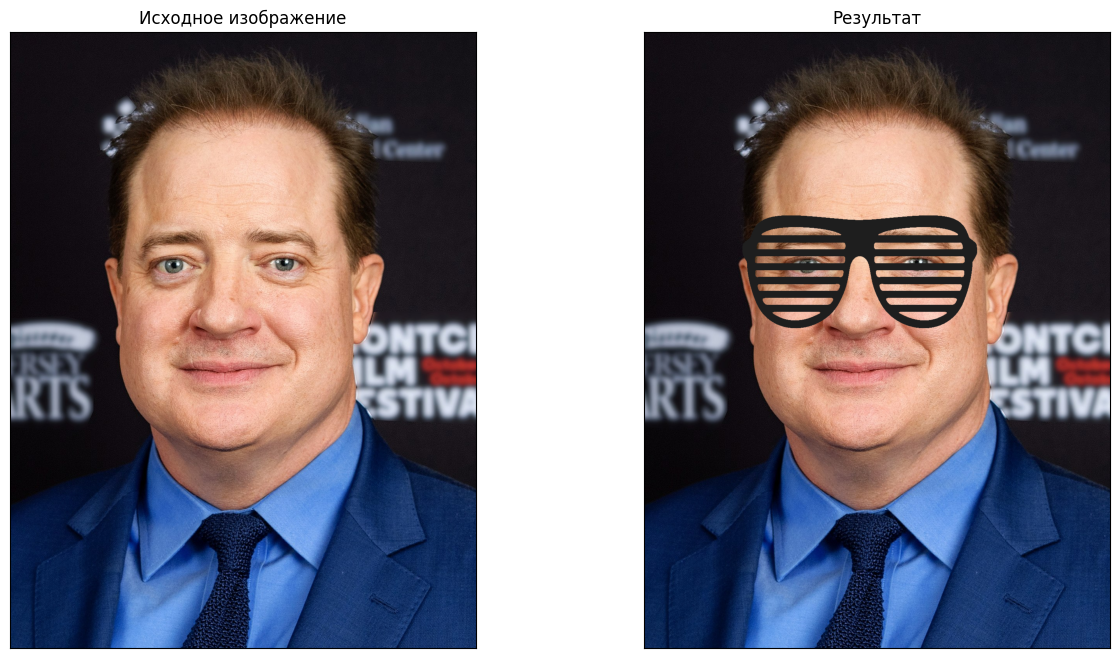

In [ ]:
if len(eyes) > 1:
    (ex1, ey1, ew1, eh1) = eyes[0]
    (ex2, ey2, ew2, eh2) = eyes[1]

    xoffset = 50
    yoffset = 50

    ex3 = width - int((ex1 + ex2) / 2 + xoffset)
    ey3 = height - int(height / 3 + yoffset)

    eyes_area = face_img[ey3:ey3+int((eh1 + eh2)), ex3:ex3+int((ew1 + ew2) * 2)]

    sunglasses_mask_small = cv2.resize(sunglasses_img, (int((ew1 + ew2) * 2), int((eh1 + eh2))), interpolation=cv2.INTER_AREA)

    gray_mask = cv2.cvtColor(sunglasses_mask_small, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(gray_mask, 50, 255, cv2.THRESH_BINARY_INV)
    mask_inv = cv2.bitwise_not(mask)

    masked_eyes = cv2.bitwise_and(sunglasses_mask_small, sunglasses_mask_small, mask=mask)
    masked_face = cv2.bitwise_and(eyes_area, eyes_area, mask=mask_inv)

    print(masked_eyes.shape)
    print(masked_face.shape)

    # Объединяем
    face_img3[ey3:ey3+int((eh1 + eh2)), ex3:ex3+int((ew1 + ew2) * 2)] = cv2.add(masked_eyes, masked_face)

show_result(face_img, face_img3)

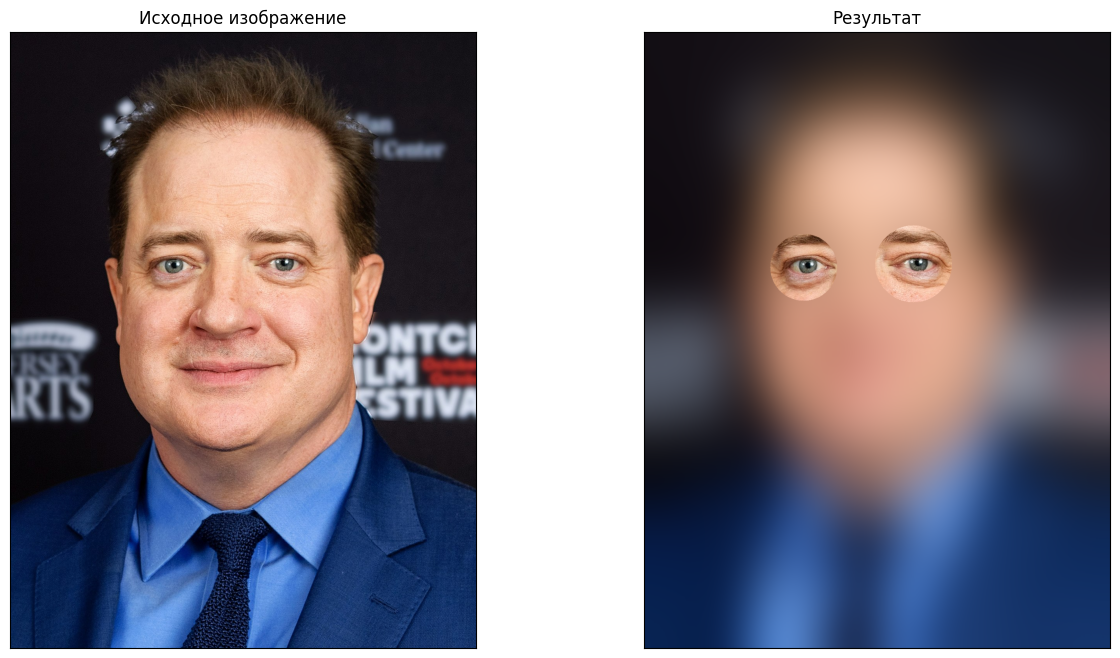

In [ ]:
import numpy as np

eyes = classifier_eye.detectMultiScale(face_img4, minSize = (100, 100))
eye_mask = np.zeros(face_img.shape[:2], dtype=np.uint8)

for (ex,ey,ew,eh) in eyes:

        center = (int(ex + 0.5*ew), int(ey + 0.5*eh))
        radius = int(0.3 * (ew + eh))
        color = (255, 255, 255)
        thickness = -1  # заливка
        cv2.circle(eye_mask, center, radius, color, thickness)

blurred_face = blur_face(face_img4)
eye_mask_inv = cv2.bitwise_not(eye_mask)
blurred_face_masked = cv2.bitwise_and(blurred_face, blurred_face, mask=eye_mask_inv)

face_img4 = cv2.add(blurred_face_masked, cv2.bitwise_and(face_img4, face_img4, mask=eye_mask))

show_result(face_img, face_img4)